Import the required libraries:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline

Code to read the data into the pandas dataframe:

In [2]:
data_mat = pd.read_csv("C:/Users/parth/Google Drive/Masters/DS/student/student-mat.csv", sep=";")
data_por = pd.read_csv("C:/Users/parth/Google Drive/Masters/DS/student/student-por.csv", sep=";")

Combining data frames data_mat and data_por to get a single dataframe:

In [3]:
data = pd.merge(data_mat, data_por, how = 'outer')
df = pd.get_dummies(data)
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,17.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,15.0,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,2.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,15.0,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


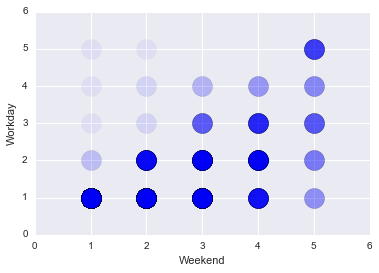

In [4]:
weekend = df['Walc']
weekday = df['Dalc']
t = weekend
plt.scatter(data['Walc'], data['Dalc'], alpha=.05, s=400)
plt.xlabel('Weekend')
plt.ylabel('Workday')
plt.show()

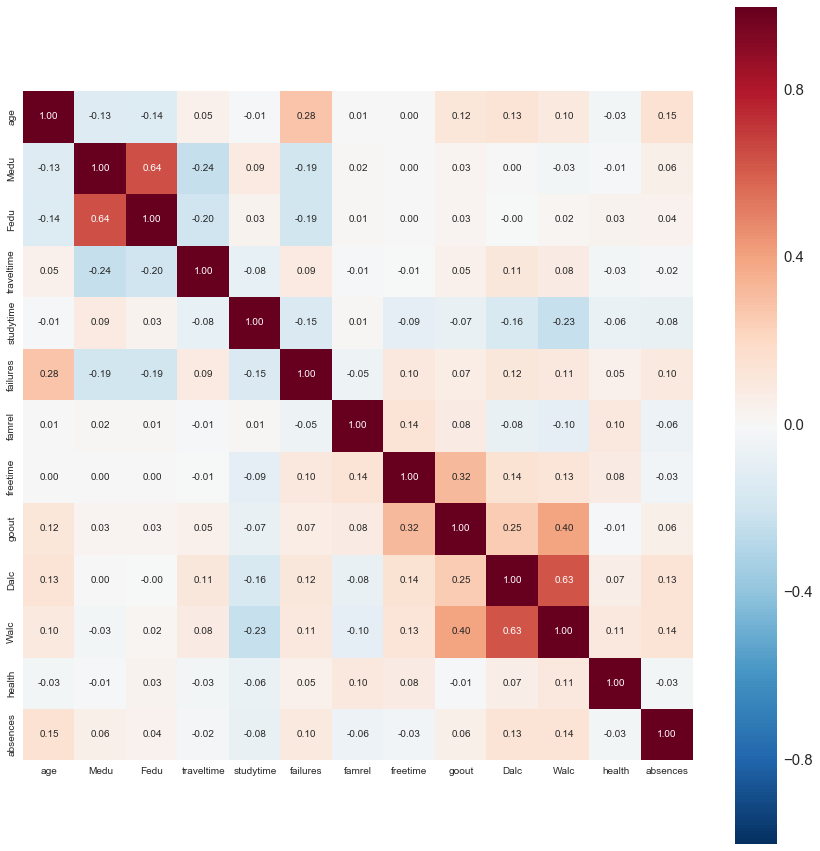

In [5]:
cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
cm = np.corrcoef(data[cols].values.T)
fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 10},
            yticklabels=cols,
            xticklabels=cols,
            ax=ax)
plt.show()

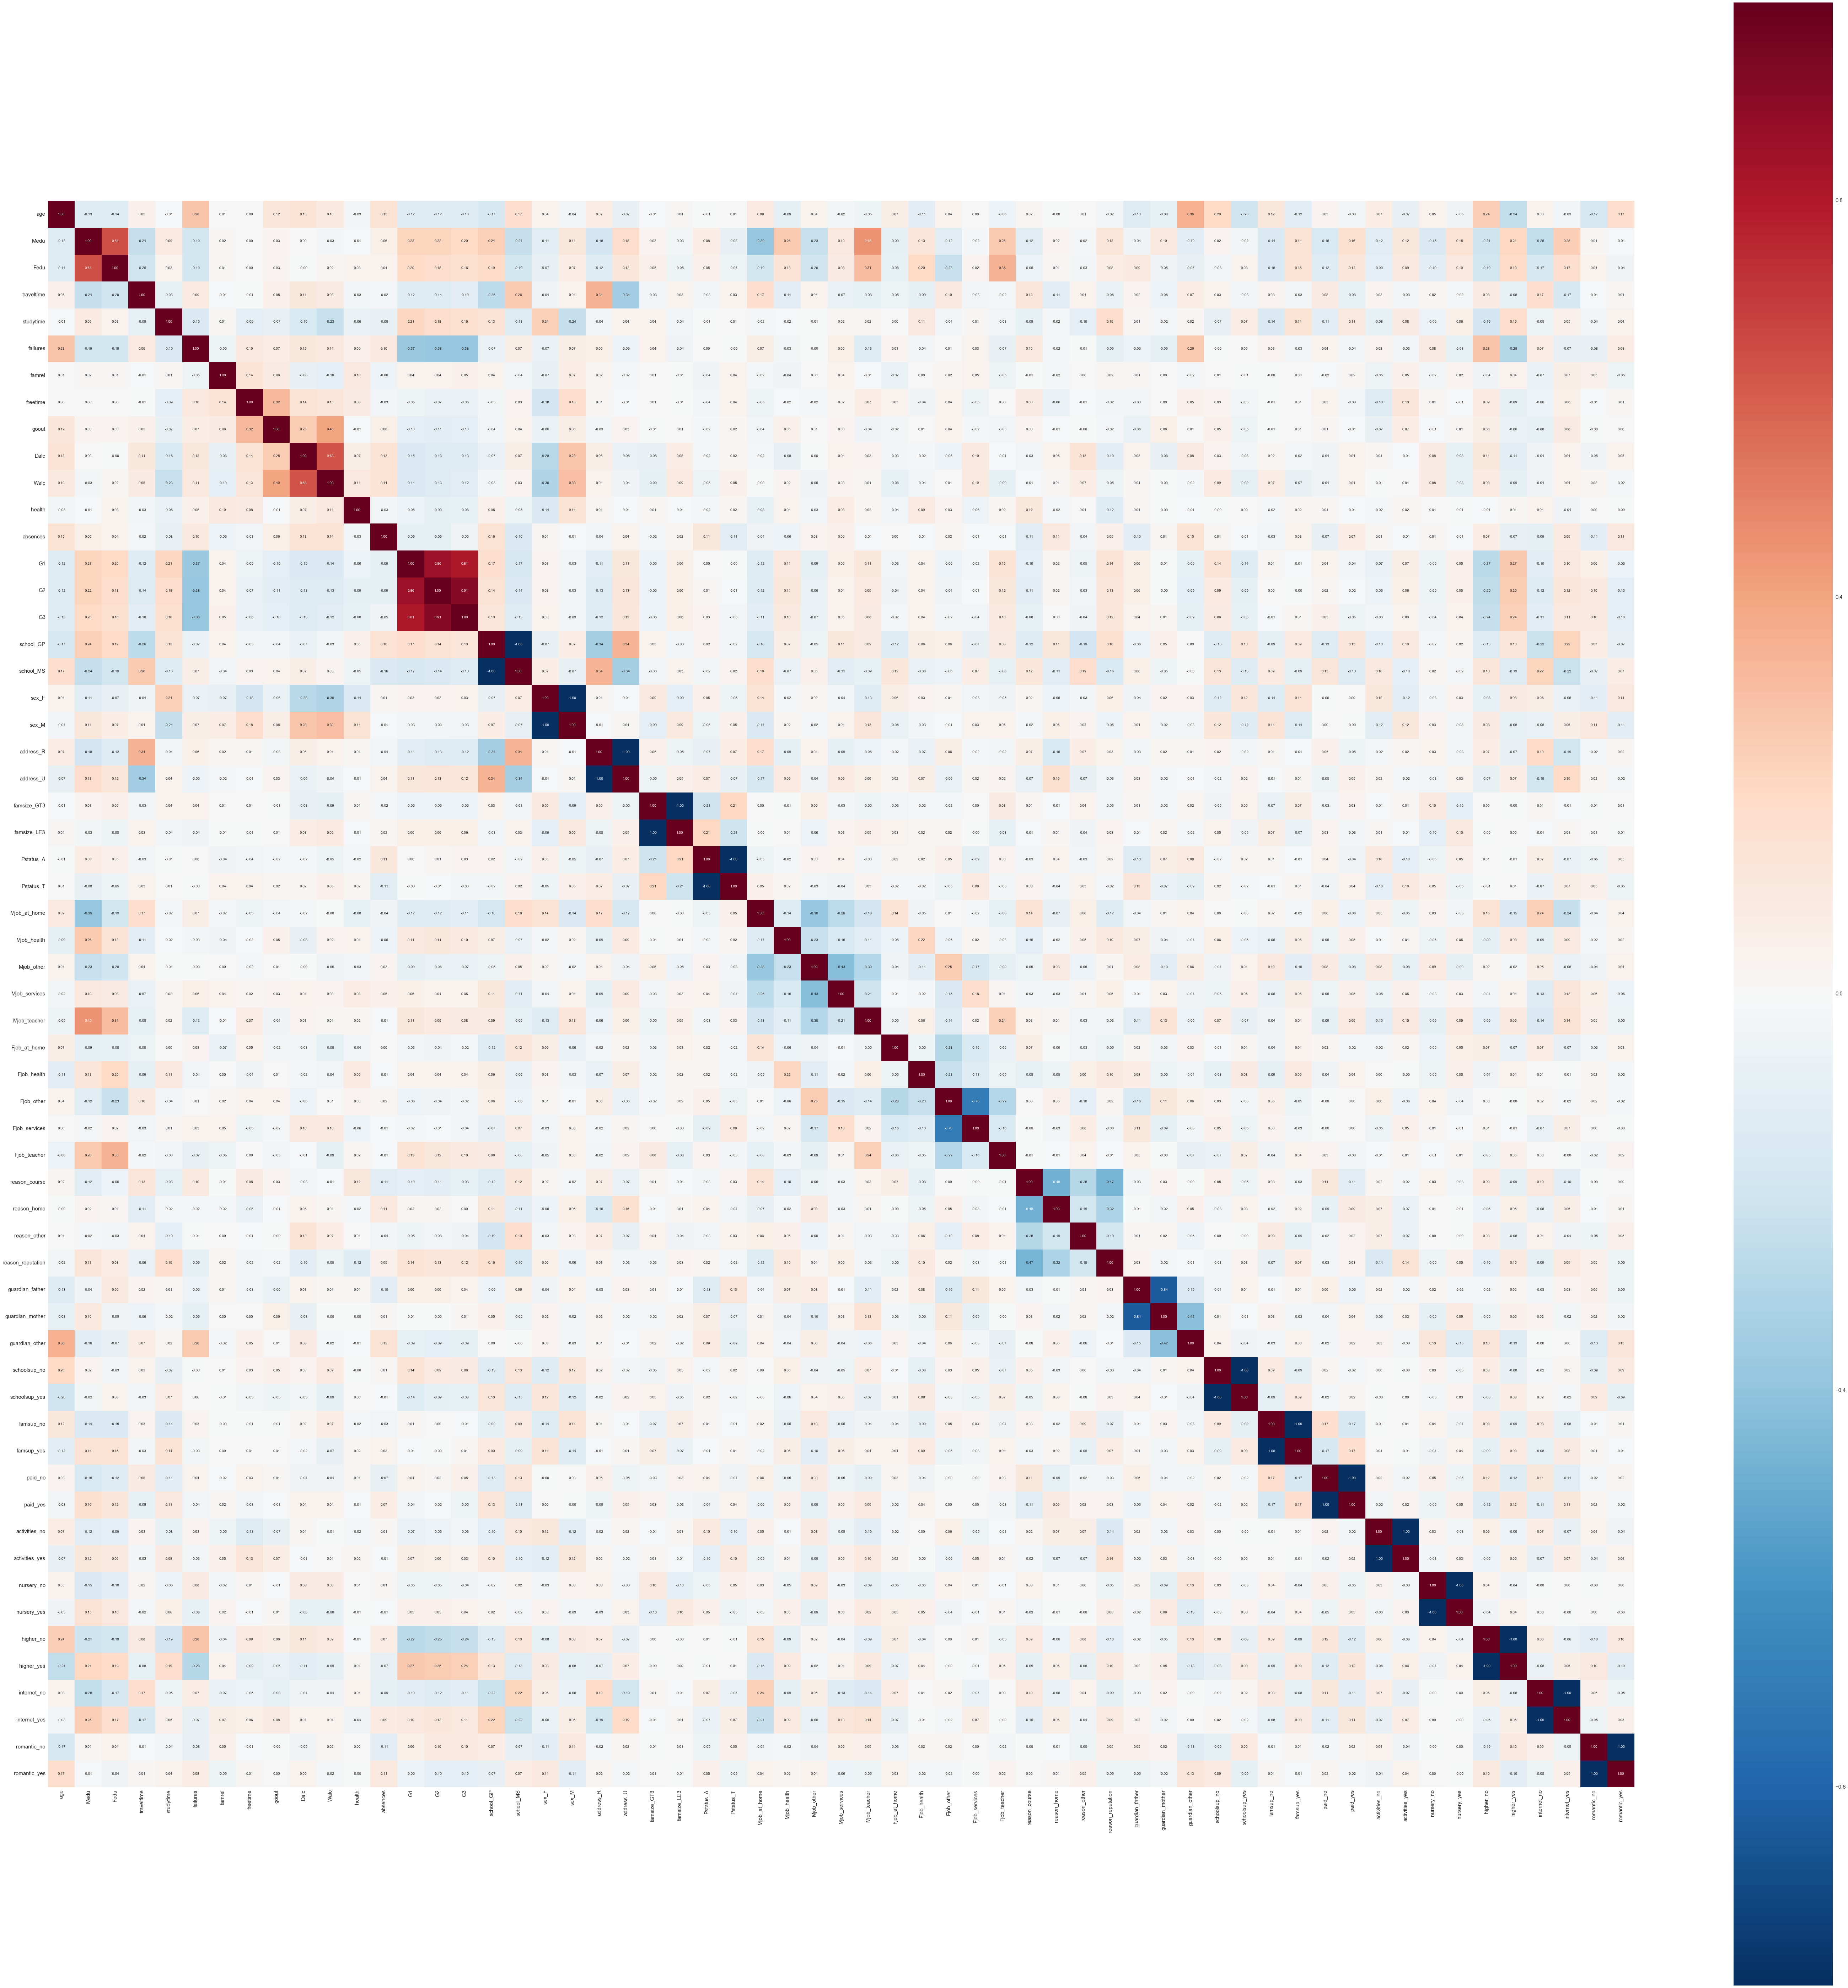

In [6]:
#cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
cols = df.columns.tolist()
cm = np.corrcoef(df[cols].values.T)
fig, ax = plt.subplots(figsize=(100,100))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 10},
            yticklabels=cols,
            xticklabels=cols,
            ax=ax)

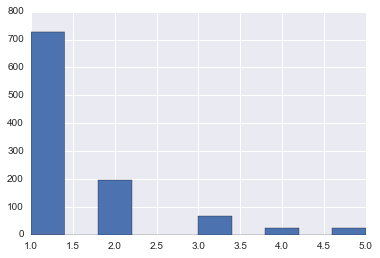

In [5]:
df['Dalc'].hist()

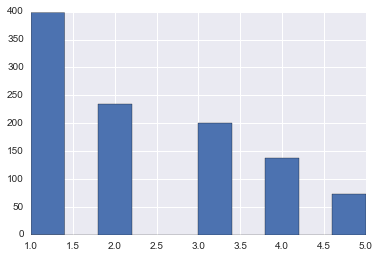

In [6]:
df['Walc'].hist()

In [24]:
df['Walc_bin'] = (df['Walc'] > 3).astype(int)
df['Dalc_bin'] = (df['Dalc'] > 1).astype(int)

np.random.seed()

#pick 80% of the sample randomly to be in the training sample
in_samp = np.random.rand(df.shape[0]) < 0.8

train_df = df[in_samp]
test_df = df[~in_samp]

test_df.size / df.size

0.18965517241379309

### Perform LR with binned Dalc as the target variable

Accuracy: 0.759433962264


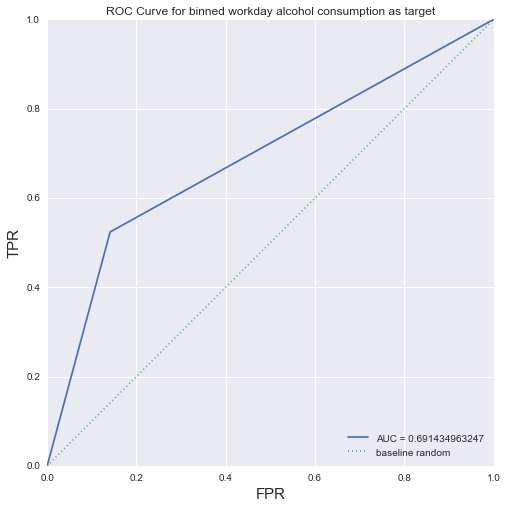

In [8]:
lr = linear_model.LogisticRegression(C=1e30, multi_class='ovr')
lr.fit(train_df.drop(['Dalc', 'Walc','Dalc_bin', 'Walc_bin'], axis = 1), train_df.Dalc_bin)
pred = lr.predict(test_df.drop(['Dalc', 'Walc','Dalc_bin', 'Walc_bin'], axis = 1))

print('Accuracy: ' + str(lr.score(test_df.drop(['Dalc', 'Walc','Dalc_bin', 'Walc_bin'], axis = 1), test_df.Dalc_bin)))

fpr, tpr, thresholds = metrics.roc_curve(test_df[['Dalc_bin']], pred)
auc_lr = metrics.roc_auc_score(test_df[['Dalc_bin']], pred)

plt.figure(figsize = (8,8))
plt.plot(fpr,tpr,label='AUC = ' + str(auc_lr))
plt.plot(fpr,fpr,':', label='baseline random')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('ROC Curve for binned workday alcohol consumption as target', fontsize = 12)
plt.legend(loc = 4)

### Perform LR with binned Walc as the target variable

Accuracy: 0.806603773585


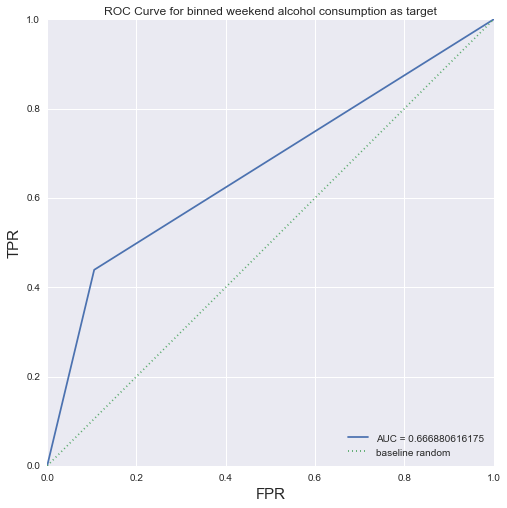

In [9]:
lr = linear_model.LogisticRegression(C=1e30, multi_class='ovr')
lr.fit(train_df.drop(['Dalc', 'Walc','Dalc_bin', 'Walc_bin'], axis = 1), train_df.Walc_bin)
pred = lr.predict(test_df.drop(['Dalc', 'Walc','Dalc_bin', 'Walc_bin'], axis = 1))

print('Accuracy: ' + str(lr.score(test_df.drop(['Dalc', 'Walc','Dalc_bin', 'Walc_bin'], axis = 1), test_df.Walc_bin)))

fpr, tpr, thresholds = metrics.roc_curve(test_df[['Walc_bin']], pred)
auc_lr = metrics.roc_auc_score(test_df[['Walc_bin']], pred)

plt.figure(figsize = (8,8))
plt.plot(fpr,tpr,label='AUC = ' + str(auc_lr))
plt.plot(fpr,fpr,':', label='baseline random')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('ROC Curve for binned weekend alcohol consumption as target', fontsize = 12)
plt.legend(loc = 4)

### Perform multi-output regression using both binned Dalc and Walc as the target variables

In [11]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

X_train = train_df.drop(['Dalc', 'Walc','Dalc_bin', 'Walc_bin'], axis = 1)
Y_train = train_df[['Dalc_bin', 'Walc_bin']]

X_test = test_df.drop(['Dalc', 'Walc','Dalc_bin', 'Walc_bin'], axis = 1)
Y_test = test_df[['Dalc_bin', 'Walc_bin']]

MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X_train, Y_train).predict(X_test)
print('R^2 = ' + str(MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X_train, Y_train).score(X_test, Y_test)))

R^2 = 0.155855201987


### Perform multi-output regression using non-binned Dalc and Walc as the target variables

In [12]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

X_train = train_df.drop(['Dalc', 'Walc','Dalc_bin', 'Walc_bin'], axis = 1)
Y_train = train_df[['Dalc', 'Walc']]

X_test = test_df.drop(['Dalc', 'Walc','Dalc_bin', 'Walc_bin'], axis = 1)
Y_test = test_df[['Dalc', 'Walc']]

#MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X_train, Y_train).predict(X_test)
print('R^2 = ' + str(MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X_train, Y_train).score(X_test, Y_test)))

R^2 = 0.245722991131


Note that the analogue to baseline random for this case is a constant regression model that disregards the input values of X and always predicts the expected value of y. That model would have an R^2 value of 0 (R^2 values can go negative).

Also note that the R^2 value is higher in this case if we do not bin the target variables.

### Perform multi-output multi-class regression using non-binned Dalc and Walc as the target variables

In [13]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
pred = multi_target_forest.fit(X_train, Y_train).predict(X_test)
print('Accuracy = ' + str(multi_target_forest.fit(X_train, Y_train).score(X_test, Y_test)))

Accuracy = 0.547169811321


Correct me if my reasoning is off, but in this case as we have 5 classes for Dalc and 5 classes for Walc, a completely random classifier would correctly label the class for Dalc with probability 0.2 and probability 0.2 for Walc. As these would be independent, the baseline random accuracy would be (0.2)*(0.2) = 0.04.